<a href="https://colab.research.google.com/github/SuhyeonHa/PatternRecognition/blob/master/hw1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
########################################################################
## Pattern Recognition - HW1 (Problem 2)
## Chung-Ang University
## Lecturer: Jongwon Choi (The graduate school of advanced imaging science, multimedia & film)
##           email: choijw@cau.ac.kr
########################################################################

# DO NOT USE ANY ADDITIONAL LIBRARY
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

(200, 20)
(200,)


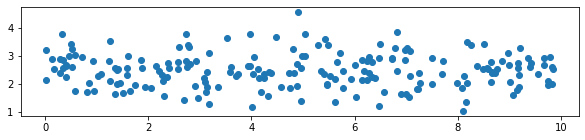

In [101]:
#####################
## REGRESSION DATA ##
#####################
SIZE_TRAINING_DATA = 200
NOISE_RATIO = 0.5
MIN_RANGE = 0.0
MAX_RANGE = 10.0
FEATURE_DIM = 20

np.random.seed(0)
feature_training = np.random.uniform(MIN_RANGE, MAX_RANGE, [SIZE_TRAINING_DATA, FEATURE_DIM])
label_training = np.mean(np.random.rand(1, FEATURE_DIM)*feature_training, 1) + np.random.randn(SIZE_TRAINING_DATA)*NOISE_RATIO

# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_training[:, 0], label_training)
f.show()

print(feature_training.shape)
print(label_training.shape)
# print(label_training)

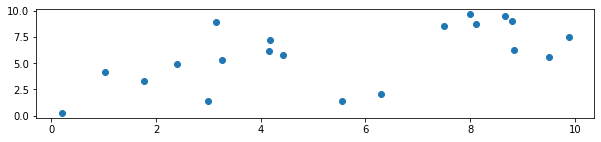

In [102]:
###############
## TEST DATA ##
###############
SIZE_TEST_DATA = 20

np.random.seed(1)
feature_test = np.random.uniform(MIN_RANGE, MAX_RANGE, [SIZE_TEST_DATA, FEATURE_DIM])

# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_test[:, 0], feature_test[:, 1])
f.show()

In [108]:
#############################################################
## Problem 1 - A 
label_test = np.zeros(SIZE_TEST_DATA) # Estimate this by Ridge regression (Normal Equation)
############################################################
# data should be in form of vector (column)
label_test = np.zeros(SIZE_TEST_DATA)
# X = feature_training
# y = label_training[:,None]
X = np.matrix(feature_training)
y = np.matrix(label_training).T
print(X.shape)
print(y.shape)

(200, 20)
(200, 1)


In [0]:
def gradient(X, y, l):
  temp = X.T@X
  # print(temp.shape)
  temp2 = temp + l*np.identity(temp.shape[0])
  # print(temp2.shape)
  temp3 = X.T@y
  # print(temp3.shape)
  w = np.linalg.inv(temp2)@temp3
  return w

In [0]:
w = gradient(X, y, 3)
# print(w)
X_test = feature_test
# print(X_test.shape)
y_hat = np.matmul(X_test, w)

In [0]:
label_test = y_hat.tolist()
# label_test

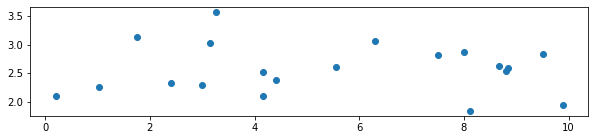

In [112]:
# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_test[:, 0], label_test)
f.show()

In [0]:
#############################################################
## Problem 1 - B
label_test = np.zeros(SIZE_TEST_DATA) # Estimate this by Ridge regression (Gradient Descent)
############################################################

In [0]:
def predict(X, w):
  return X@w

In [0]:
def ObjFnc(X, y, w, l):
  y_hat = X@w
  diff = y_hat - y
  # print(y_hat.shape)
  # print(y.shape)
  # print(diff.shape)
  term1 = (diff.T@diff)/2
  # print(term1)
  # print(term1.shape)
  # print(w.shape)
  term2 = (l*(w.T@w))/ 2
  # print(term2)
  # print(term2.shape)
  return term1 + term2

In [116]:
# X: (n,d), y: (n,1), w: (d,1)
X = np.mat(feature_training)
y = np.mat(label_training).T
w = np.mat(np.zeros((FEATURE_DIM, 1)))
print(X.shape)
print(y.shape)
print(w.shape)

(200, 20)
(200, 1)
(20, 1)


In [117]:
l = 10
lr = 1e-5
itr = 100
cost_list = []

for i in range(itr):
  cost_prev = ObjFnc(X, y, w, l)
  cost_list.append(cost_prev)
  # print(cost_prev)
  new_w = w - lr*(X.T@X@w - X.T@y + l*w)
  cost_next = ObjFnc(X, y, new_w, l)
  # print(cost_next)
  if(cost_prev < cost_next): # repeat until convergence cost_prev < cost_next
    break
  else:
    w = new_w

final_step = i
final_w = w
print(f'final_step {final_step}')
print(f'final_cost {cost_prev}')
# print(f'cost {cost_list}')

final_step 99
final_cost [[24.60666211]]


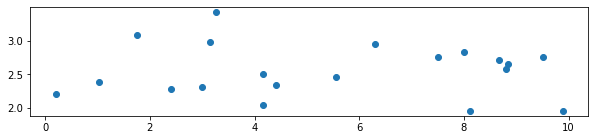

In [118]:
X_test = feature_test
# print(X_test.shape)
y_hat = np.matmul(X_test, w)
label_test = y_hat.tolist()
############################################################
# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_test[:, 0], label_test)
f.show()

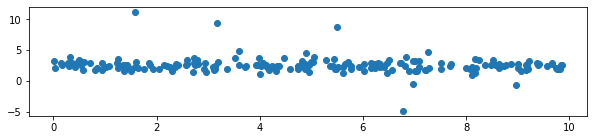

In [119]:
###########################
## NOISY REGRESSION DATA ##
###########################
SIZE_NOISE_DATA = 10
NOISE_POWER = 5.0

np.random.seed(0)
label_training_noisy = label_training.copy()
label_training_noisy[:SIZE_NOISE_DATA] = np.random.randn(SIZE_NOISE_DATA)*NOISE_POWER

# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_training[:, 0], label_training_noisy)
f.show()

In [0]:
#############################################################
## Problem 1 - C
label_test = np.zeros(SIZE_TEST_DATA) # Estimate this by Noise-robust L1-norm regression (Gradient Descent)
############################################################

In [0]:
def loss_h(r, epsilon):
  num = r.size
  result = np.zeros_like(r)
  for i in range(num):
    if np.abs(r[i]) <= epsilon:
      result[i] = (r[i] ** 2)/2
    else:
      result[i] = epsilon*(np.abs(r[i])-(epsilon/2))
  return np.sum(result)

In [0]:
def grad_h(X, y, w, epsilon):
  r = X@w - y
  num = r.size
  result = np.zeros_like(r)
  for i in range(num):
    if np.abs(r[i]) <= epsilon:
      result[i] = r[i]
    else:
      result[i] = epsilon*np.sign(r[i])
  return result

In [0]:
def predict_y(X, r):
  print(X.shape)
  print(r.shape)
  return h@r

In [124]:
## Your implementation (Use feature_training and label_training_noisy)
X = np.mat(feature_training)
y = np.mat(label_training_noisy).T
w = np.mat(np.zeros((FEATURE_DIM, 1)))
print(X.shape)
print(y.shape)
print(w.shape)

(200, 20)
(200, 1)
(20, 1)


In [125]:
epsilon = 1
lr = 1e-1
itr = 100
cost_list = []
r = X@w - y
for i in range(itr):
  cost_prev = loss_h(r, epsilon)
  cost_list.append(cost_prev)
  # print(cost_prev)
  gradient = grad_h(X, y, w, epsilon)
  new_r = r - lr*gradient
  cost_next = loss_h(new_r, epsilon)
  # print(cost_next)
  if(cost_prev < cost_next): # repeat until convergence cost_prev < cost_next
    break
  else:
    r = new_r

final_step = i
final_r = r
print(f'final_step {final_step}')
print(f'final_cost {cost_prev}')
# print(f'cost {cost_list}')

final_step 25
final_cost 60.808077049679646


In [0]:
label_test = r.tolist()

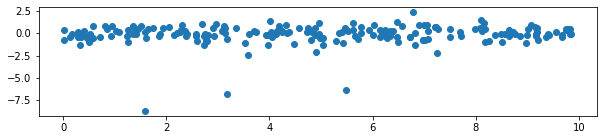

In [127]:
############################################################
# Plot the samples
f, ax = plt.subplots(1, figsize=(10, 2))
ax.scatter(feature_training[:, 0], label_test)
f.show()